## $V_B^-$ coupled to three nitrogen nuclear spins via Fermi contact

In [1]:
from qutip import *
from matplotlib.pyplot import figure
from scipy.signal import argrelextrema
import numpy as np
import time
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [2]:
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [3]:
# T2 decoherence
Gamma_2 = np.array([1/(2e-6),1/(4e-6)]) # Correction
units = 2*np.pi*1e6
Gamma_2 = Gamma_2/units

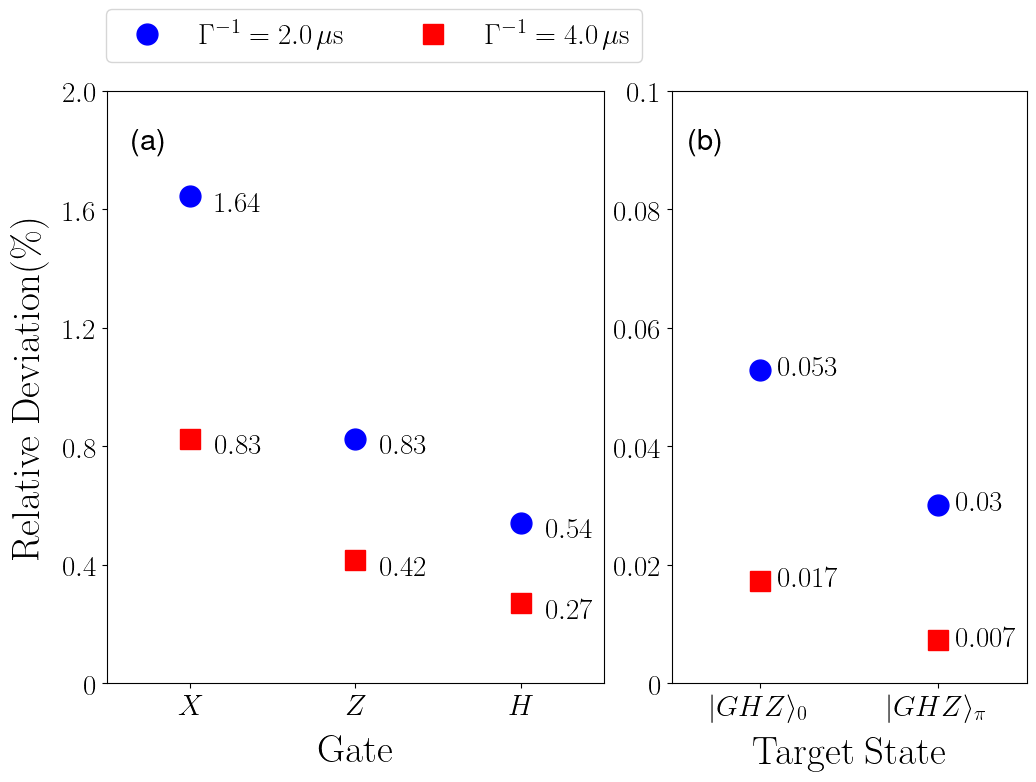

In [4]:
import pickle
fidel_Szz_H = pickle.load(open("Fidelity_Weyl_Hadamard-zy-axis-Szz", "rb"))
fidel_ref_H = pickle.load(open("Fidelity_Weyl_Hadamard-zy-axis-ref", "rb"))
fidel_Szz_X = pickle.load(open("Fidelity_Weyl_X-zy-axis-Szz", "rb"))
fidel_ref_X = pickle.load(open("Fidelity_Weyl_X-zy-axis-ref", "rb"))
fidel_Szz_Z = pickle.load(open("Fidelity_Weyl_Z-zy-axis-Szz", "rb"))
fidel_ref_Z = pickle.load(open("Fidelity_Weyl_Z-zy-axis-ref", "rb"))

M_H = 500
M_X = 500
M_Z = 100

CS = ['bo','rs','k^','gP','m*']

point_x = [1,2,3]
fidel_ref = [fidel_ref_X[0,M_X], fidel_ref_Z[2,M_Z], fidel_ref_H[0,M_H]]
fidel_Szz = [[fidel_Szz_X[l,M_X], fidel_Szz_Z[l,M_Z], fidel_Szz_H[l,M_H]] for l in range(len(Gamma_2))]

fidel_diff_Szz_relative = [[100*(fidel_ref[k]-fidel_Szz[l][k])/fidel_ref[k] for k in range(len(point_x))] for l in range(len(Gamma_2))]

#---------------------------------------#

fidel_GHZ_Szz_GHZ0 = pickle.load(open("Fidelity_GHZ_prep_0-Szz", "rb")) # THE SCRIPT IS ERROR, HAVE TO RUN AGAIN TOMORROW
fidel_GHZ_ref_GHZ0 = pickle.load(open("Fidelity_GHZ_prep_0-ref", "rb"))
fidel_GHZ_Szz_GHZpi = pickle.load(open("Fidelity_GHZ_prep_pi-Szz", "rb"))
fidel_GHZ_ref_GHZpi = pickle.load(open("Fidelity_GHZ_prep_pi-ref", "rb"))

M = 500

point_GHZ_x = [1,2]
fidel_GHZ_ref = [fidel_GHZ_ref_GHZ0[0,M], fidel_GHZ_ref_GHZpi[0,M]]
fidel_GHZ_Szz = [[fidel_GHZ_Szz_GHZ0[l,M], fidel_GHZ_Szz_GHZpi[l,M]] for l in range(len(Gamma_2))]

fidel_GHZ_diff_Szz_relative = [[ 100*(fidel_GHZ_ref[k]-fidel_GHZ_Szz[l][k])/fidel_GHZ_ref[k] for k in range(len(point_GHZ_x))] for l in range(len(Gamma_2))]



###################################################################

fig, axis = plt.subplots(1,2, gridspec_kw={'width_ratios': [2.8, 2]},layout='constrained',sharex=False,sharey=False,figsize=(10.25,7))

Gamma_2_cut = [l for l in Gamma_2]
offset = len(Gamma_2) - len(Gamma_2_cut)

line = [[] for l in range(len(Gamma_2_cut))]
for l in range(len(Gamma_2_cut)):
    line[l], =axis[0].plot(point_x, fidel_diff_Szz_relative[l+offset], CS[l], markersize=15, label=r"$\Gamma^{-1}="+str(np.around(Gamma_2_cut[l]**-1,decimals=1))+r"~\rm{\mu s}$")

max_list_point = [[fidel_diff_Szz_relative[l+offset][k] for k in range(len(point_x))] for l in range(len(Gamma_2_cut))]
max_list = [[np.around(fidel_diff_Szz_relative[l+offset][k],decimals=2) for k in range(len(point_x))] for l in range(len(Gamma_2_cut))]

axis[0].set_xlabel(r'$\rm Gate$', fontsize=28, labelpad=10)
axis[0].set_xticks(np.array([1,2,3]),[r'$X$',r'$Z$',r'$H$'], fontsize=21)
axis[0].set_ylabel(r'$\rm Relative~Deviation (\%)$', fontsize=28, labelpad=10)
y_list = [0,0.4,0.8,1.2,1.6,2.0]
ylist_lab = [r'$'+str(ylab)+'$' for ylab in y_list]
axis[0].set_yticks(y_list, ylist_lab, fontsize=21)
axis[0].autoscale(enable=True, axis='x', tight=True)

axis[0].set_xlim(0.5, 3.5)

for k in range(len(point_x)):
    for l in range(len(Gamma_2_cut)):
        axis[0].text(point_x[k] + 0.15, max_list_point[l][k] - 0.05, r'$'+str(max_list[l][k])+'$', fontsize=21)

axis[0].text(0.05, 0.90, r'(a)',transform=axis[0].transAxes,size=21)

#---------------------------------------#

line1 = [[] for k in range(len(Gamma_2_cut))]
for l in range(len(Gamma_2_cut)):
    line1[l], =axis[1].plot(point_GHZ_x, fidel_GHZ_diff_Szz_relative[l+offset], CS[l], markersize=15, label=r"$\Gamma^{-1}="+str(np.around(Gamma_2_cut[l]**-1,decimals=1))+r"~\rm{\mu s}$")


max_list_point = [[fidel_GHZ_diff_Szz_relative[l+offset][k] for k in range(len(point_GHZ_x))] for l in range(len(Gamma_2_cut))]
max_list = [[np.around(fidel_GHZ_diff_Szz_relative[l+offset][k],decimals=3) for k in range(len(point_GHZ_x))] for l in range(len(Gamma_2_cut))]

axis[1].set_xlabel(r'$\rm Target~State$', fontsize=28, labelpad=10)
axis[1].set_xticks(np.array([1,2]),[r'$\lvert GHZ\rangle_0$',r'$\lvert GHZ\rangle_\pi$'], fontsize=21)
y_list = [0,.02,.04,.06,.08,0.1]
ylist_lab = [r'$'+str(ylab)+'$' for ylab in y_list]
axis[1].set_yticks(y_list,ylist_lab, fontsize=21)
axis[1].autoscale(enable=True, axis='x', tight=True)

for k in range(len(point_GHZ_x)):
    for l in range(len(Gamma_2_cut)):
        axis[1].text(point_GHZ_x[k] + 0.1, max_list_point[l][k] - 0.001, r'$'+str(max_list[l][k])+'$', fontsize=21)

axis[1].set_xlim(0.5, 2.5)
axis[1].text(0.05, 0.90, r'(b)',transform=axis[1].transAxes,size=21)


line_labels = [r"$\Gamma^{-1}="+str(np.around(1e6*(Gamma_2_cut[l]*units)**-1,decimals=1))+r"~\!\rm{\mu s}$" for l in range(len(Gamma_2_cut))]


fig.legend(labels=line_labels, fontsize=21, ncol=3, borderaxespad=0.1, loc='upper left',bbox_to_anchor=(0.095, 1.1))

plt.savefig('Fig6_Fidelity_decoherence.pdf',bbox_inches='tight')
